# Introduction

This notebook introduces usage of AnnData and Scanpy to analyze single-cell RNA-seq data. We will load a publicly available data into AnnData and use Scanpy to do basic QC.

# Load packages

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

Please make sure you have downloaded data called `Feature/Cell Matrix HDF5 (filtered)` from here: https://www.10xgenomics.com/datasets/10-k-pbm-cs-from-a-healthy-donor-v-3-chemistry-3-standard-3-0-0 .

In [2]:
adata = sc.read_10x_h5('/Users/sharmar1/Dropbox/msk_workshop/Handong_2025/data/pbmc_10k_v3_filtered_feature_bc_matrix.h5')

/usr/local/Caskroom/miniforge/base/envs/workshop_2025/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/usr/local/Caskroom/miniforge/base/envs/workshop_2025/lib/python3.10/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
adata.var_names_make_unique()

In [4]:
adata

AnnData object with n_obs × n_vars = 11769 × 33538
    var: 'gene_ids', 'feature_types', 'genome'

## The count data matrix

The actual count matrix is stored in adata.X:

In [5]:
adata.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 24825783 stored elements and shape (11769, 33538)>

In [6]:
adata.X.data

array([1., 4., 2., ..., 1., 1., 1.], dtype=float32)

To convert the matrix from sparse CSR format to a more legible matrix like format:

In [7]:
adata.X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Cell barcodes

The cell barcodes are stored in adata.obs:

In [8]:
adata.obs

""
AAACCCAAGCGCCCAT-1
AAACCCAAGGTTCCGC-1
AAACCCACAGAGTTGG-1
AAACCCACAGGTATGG-1
AAACCCACATAGTCAC-1
...
TTTGTTGGTGTCATGT-1
TTTGTTGGTTTGAACC-1
TTTGTTGTCCAAGCCG-1
TTTGTTGTCTTACTGT-1


In [9]:
type(adata.obs)

pandas.core.frame.DataFrame

## Genes

The gene names are in adata.var:

In [10]:
adata.var

,gene_ids,feature_types,genome
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38
FAM138A,ENSG00000237613,Gene Expression,GRCh38
OR4F5,ENSG00000186092,Gene Expression,GRCh38
AL627309.1,ENSG00000238009,Gene Expression,GRCh38
AL627309.3,ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
AC233755.2,ENSG00000277856,Gene Expression,GRCh38
AC233755.1,ENSG00000275063,Gene Expression,GRCh38
AC240274.1,ENSG00000271254,Gene Expression,GRCh38
AC213203.1,ENSG00000277475,Gene Expression,GRCh38


In [11]:
type(adata.var)

pandas.core.frame.DataFrame

## Sparsity affects gene-gene relationships

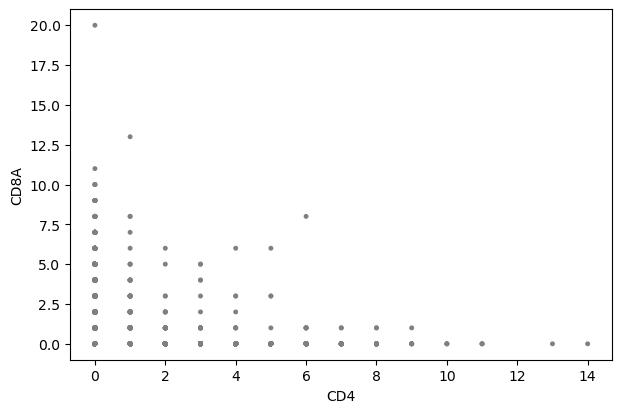

In [12]:
sc.pl.scatter(adata, x = 'CD4', y = 'CD8A', size = 50)

Visualize the same data colored by density:

In [13]:
from scipy.stats import gaussian_kde

x = adata[:, 'CD4'].X.toarray().flatten()
y = adata[:, 'CD8A'].X.toarray().flatten()

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

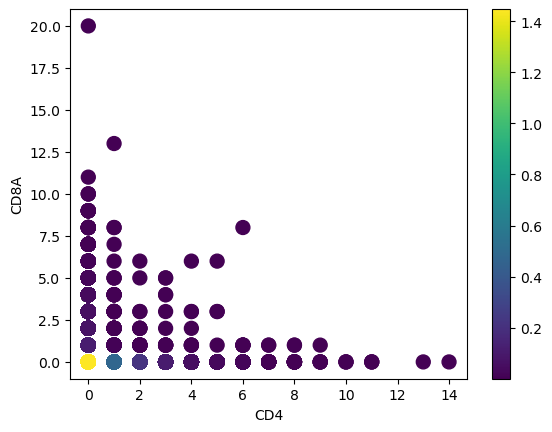

In [14]:
fig, ax = plt.subplots()
im1 = ax.scatter(x, y, c=z, s=100)
ax.set_xlabel('CD4')
ax.set_ylabel('CD8A')
fig.colorbar(im1)
plt.show()


# Calculate QC metrics

In [15]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [16]:
adata

AnnData object with n_obs × n_vars = 11769 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [17]:
adata.obs.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
AAACCCAAGCGCCCAT-1,1087,6.992096,2204.0,7.698483,34.437387,44.782214,55.716878,73.366606
AAACCCAAGGTTCCGC-1,4200,8.343078,20090.0,9.908028,30.751618,43.753111,55.739174,67.819811
AAACCCACAGAGTTGG-1,1836,7.515889,5884.0,8.680162,42.641061,52.923182,62.542488,75.254929
AAACCCACAGGTATGG-1,2216,7.703910,5530.0,8.618124,32.839060,41.681736,51.175407,65.280289
AAACCCACATAGTCAC-1,1615,7.387709,5106.0,8.538367,41.676459,56.423815,65.648257,78.162946


In [18]:
adata.var.head()

,gene_ids,feature_types,genome,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,GRCh38,0,0.000000,0.00000,100.000000,0.0,0.000000
FAM138A,ENSG00000237613,Gene Expression,GRCh38,0,0.000000,0.00000,100.000000,0.0,0.000000
OR4F5,ENSG00000186092,Gene Expression,GRCh38,0,0.000000,0.00000,100.000000,0.0,0.000000
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,60,0.005183,0.00517,99.490186,61.0,4.127134
AL627309.3,ENSG00000239945,Gene Expression,GRCh38,4,0.000340,0.00034,99.966012,4.0,1.609438


## Visualize library size

Library size is defined as the total RNA counts per cell, so essentially row sum in adata.X:

Text(0, 0.5, 'Frequency')

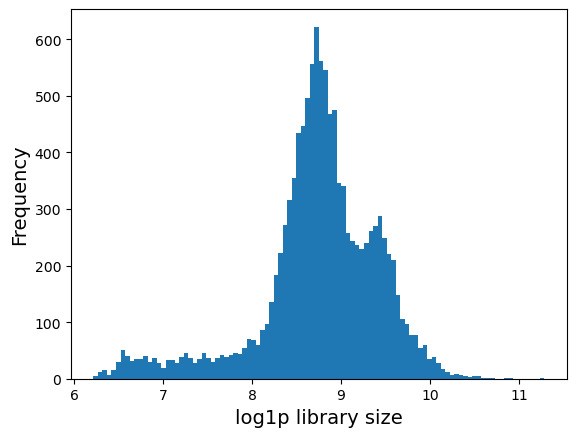

In [19]:
plt.hist(adata.obs['log1p_total_counts'], 100);
plt.xlabel('log1p library size', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

## Visualize the number of genes in each cell

Text(0, 0.5, 'Frequency')

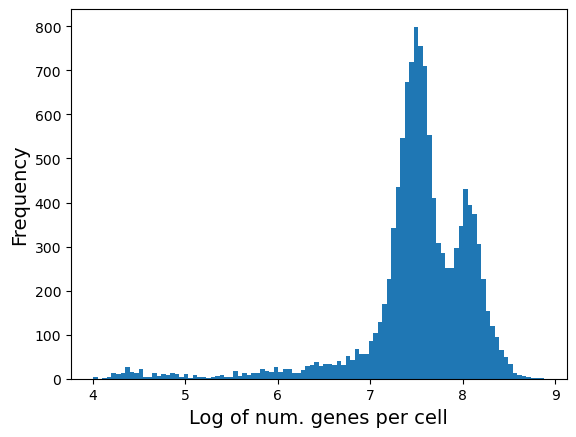

In [20]:
plt.hist(adata.obs['log1p_n_genes_by_counts'], bins = 100);
plt.xlabel('Log of num. genes per cell', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
#plt.title('Histogram of number of genes expressed in each cell', fontsize = 14)

Text(0.5, 1.0, 'Correlation = 0.93')

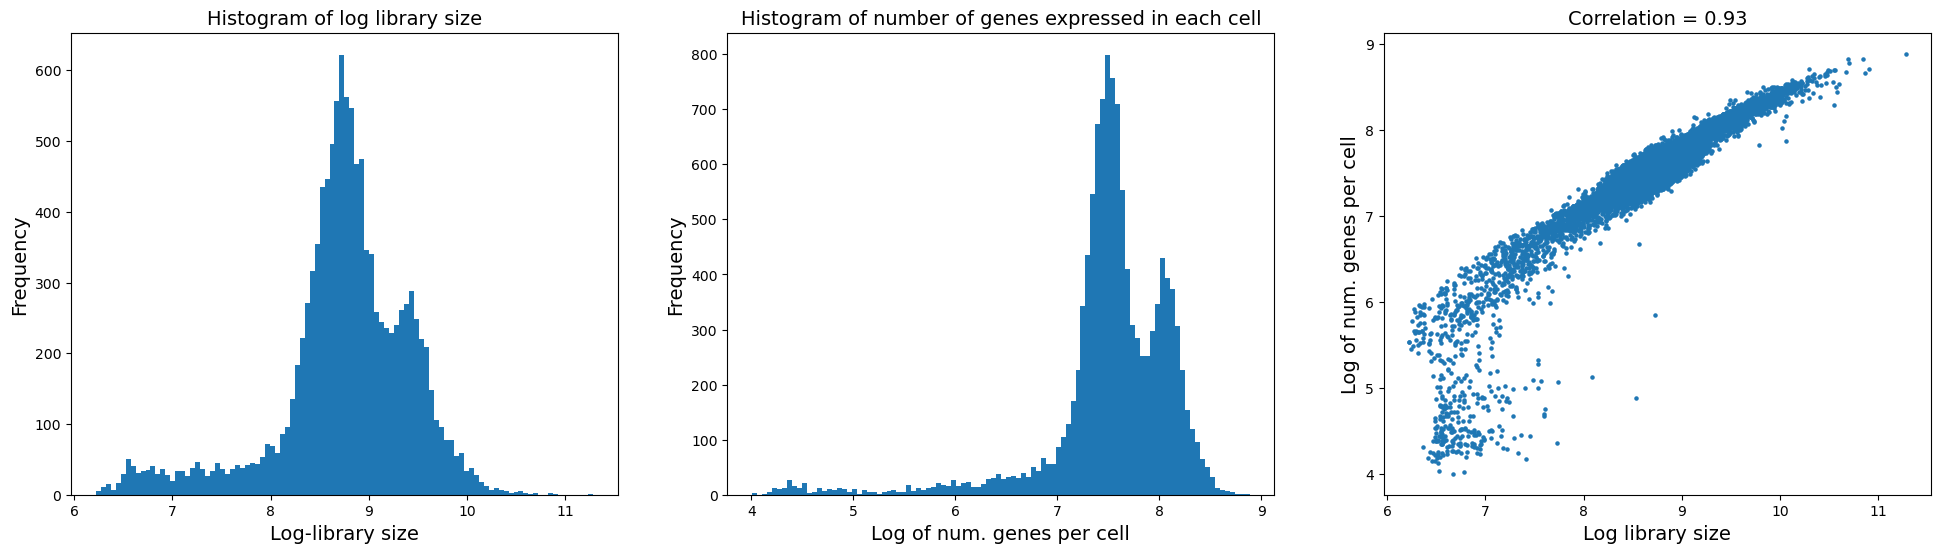

In [21]:
fig = plt.figure(figsize = (8*3, 6*1))
ax = fig.add_subplot(1, 3, 1)
ax.hist(adata.obs['log1p_total_counts'], bins = 100);
ax.set_xlabel('Log-library size', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_title('Histogram of log library size', fontsize = 14)

ax = fig.add_subplot(1, 3, 2)
ax.hist(adata.obs['log1p_n_genes_by_counts'], bins = 100);
ax.set_xlabel('Log of num. genes per cell', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_title('Histogram of number of genes expressed in each cell', fontsize = 14)

ax = fig.add_subplot(1, 3, 3)
x = adata.obs['log1p_total_counts']
y = adata.obs['log1p_n_genes_by_counts']
ax.scatter(x, y, s = 5);
ax.set_ylabel('Log of num. genes per cell', fontsize = 14)
ax.set_xlabel('Log library size', fontsize = 14)
corr_coef = np.corrcoef(x, y)[0, 1]
ax.set_title('Correlation = ' + str(round(corr_coef, 3)), fontsize = 14)

## Mitochondrial content

Genes starting with 'MT' are associated with mitochondrial content of the cell. Higher mitochondrial content indicates that the cell is undergoing apoptosis.

In [22]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'

In [23]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [24]:
adata

AnnData object with n_obs × n_vars = 11769 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt'

### Visualize Mito-content

Text(0, 0.5, '% MT-content')

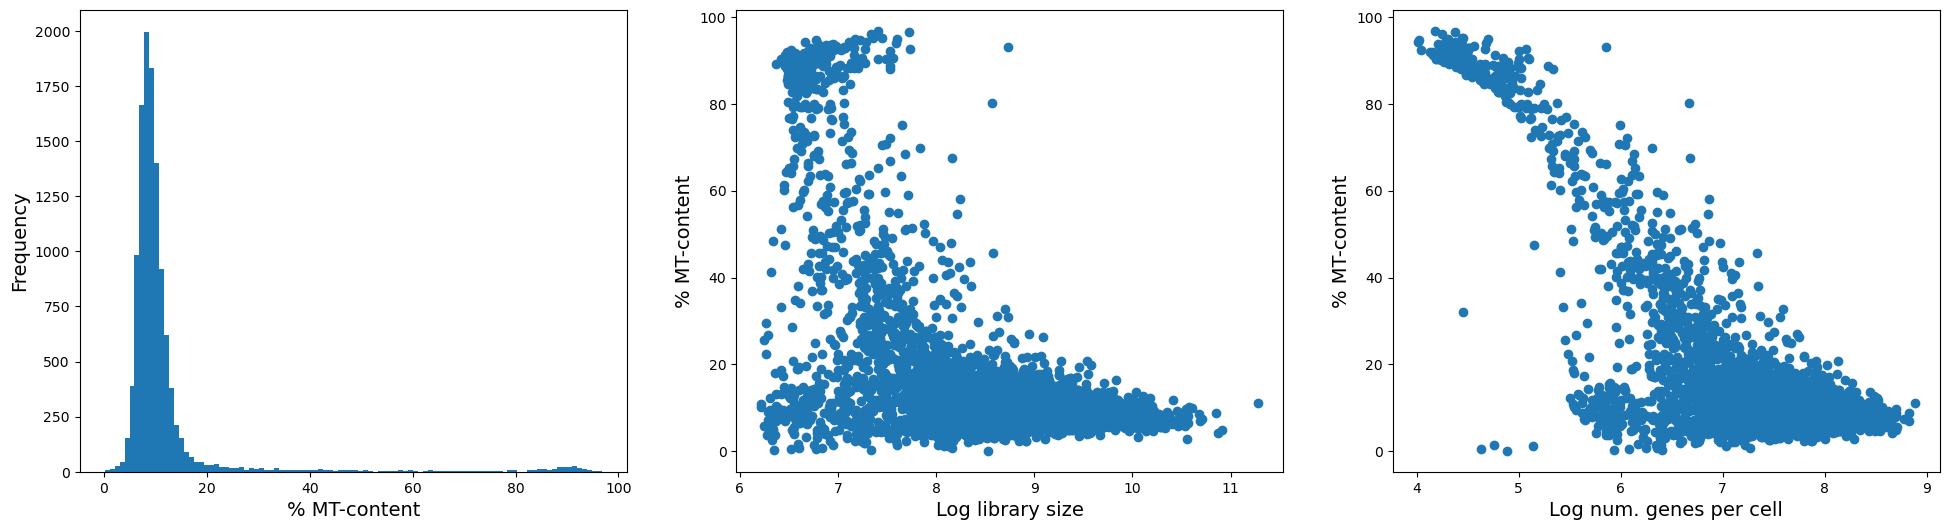

In [25]:
fig = plt.figure(figsize = (8*3, 6*1))
ax = fig.add_subplot(1, 3, 1)
ax.hist(adata.obs['pct_counts_mt'], 100);
ax.set_xlabel('% MT-content', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)

ax = fig.add_subplot(1, 3, 2)
ax.scatter(adata.obs['log1p_total_counts'], adata.obs['pct_counts_mt']);
ax.set_xlabel('Log library size', fontsize = 14)
ax.set_ylabel('% MT-content', fontsize = 14)

ax = fig.add_subplot(1, 3, 3)
ax.scatter(adata.obs['log1p_n_genes_by_counts'], adata.obs['pct_counts_mt']);
ax.set_xlabel('Log num. genes per cell', fontsize = 14)
ax.set_ylabel('% MT-content', fontsize = 14)

As you can see from the left plot, there are only very cells with substantial MT content. And from the figure on the right, you can see that those cells with high MT-content are also the ones with low number of genes expressed (or library size). As such, we argue to remove these high MT-cells.

For the sake of exposition, the following code removes cells with MT-content greater than 25%.

In [26]:
adata_clean = adata[adata.obs['pct_counts_mt'] < 25, :]

In [27]:
adata_clean

View of AnnData object with n_obs × n_vars = 11179 × 33538
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt'

Text(0, 0.5, 'Frequency')

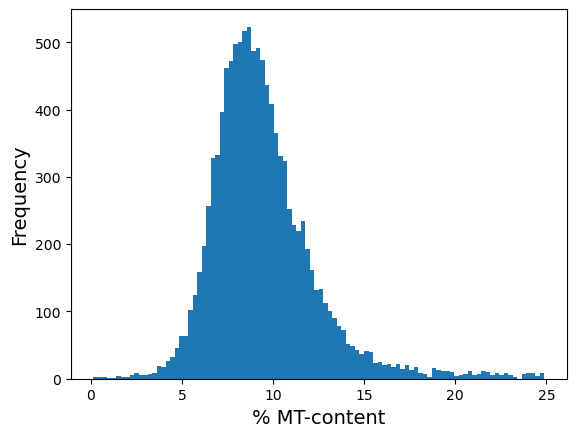

In [28]:
# just double check: there must be no cell with MT > 25
plt.hist(adata_clean.obs['pct_counts_mt'], 100);
plt.xlabel('% MT-content', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

## Plot number of genes expressed in each cell

Text(0.5, 1.0, 'Histogram of number of cells each gene is expressed in')

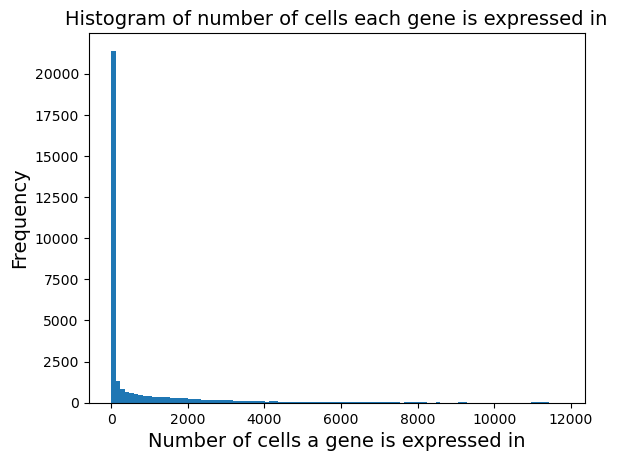

In [29]:
plt.hist(adata_clean.var['n_cells_by_counts'], bins = 100);
plt.xlabel('Number of cells a gene is expressed in', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.title('Histogram of number of cells each gene is expressed in', fontsize = 14)

We see that there are a lot of genes that are expressed in 0 cells. We can zoom in the plot to verify and we will remove them.

(0.0, 1000.0)

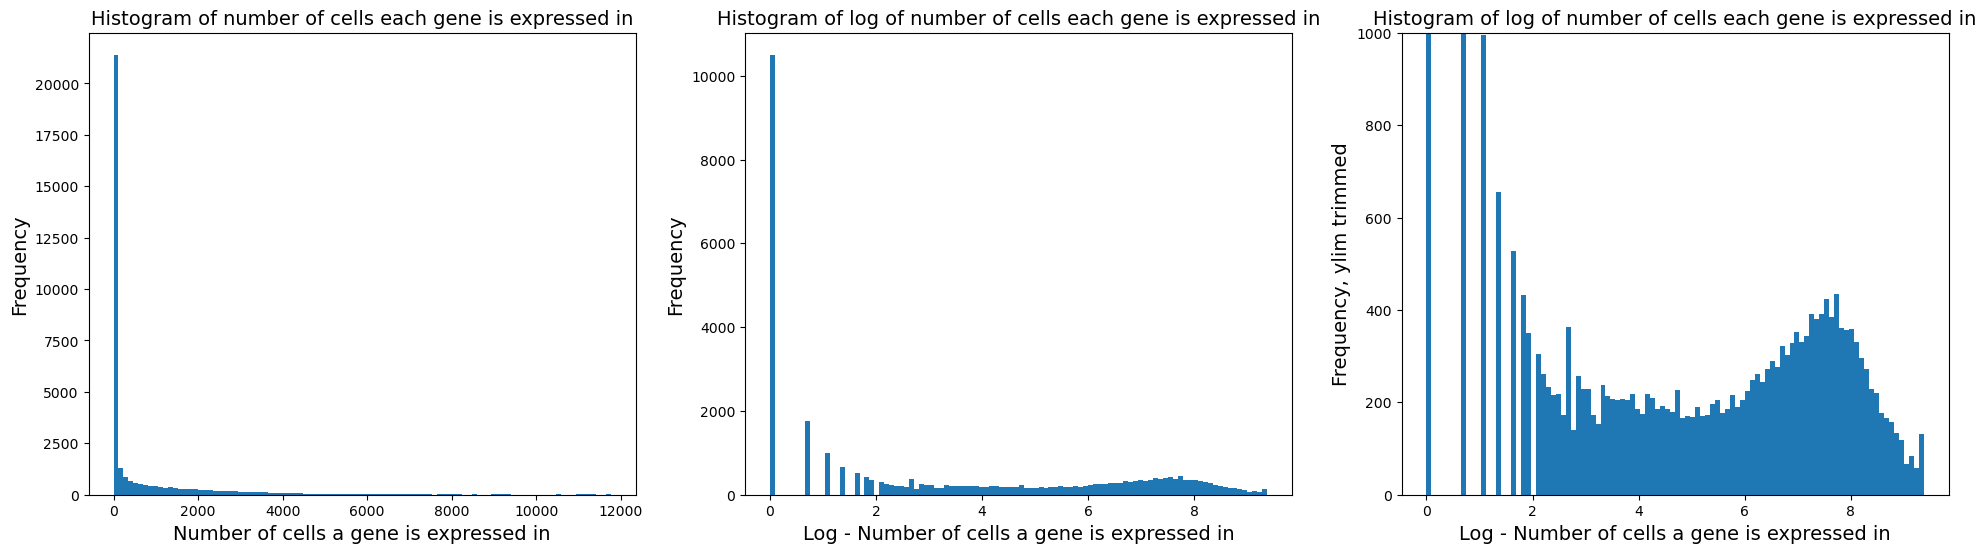

In [30]:
fig = plt.figure(figsize = (8*3, 6*1))
ax = fig.add_subplot(1, 3, 1)
ax.hist(adata_clean.var['n_cells_by_counts'], bins = 100);
ax.set_xlabel('Number of cells a gene is expressed in', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_title('Histogram of number of cells each gene is expressed in', fontsize = 14)

ax = fig.add_subplot(1, 3, 2)
ax.hist(np.log(adata_clean.var['n_cells_by_counts'] + 1), bins = 100);
ax.set_xlabel('Log - Number of cells a gene is expressed in', fontsize = 14)
ax.set_ylabel('Frequency', fontsize = 14)
ax.set_title('Histogram of log of number of cells each gene is expressed in', fontsize = 14)

ax = fig.add_subplot(1, 3, 3)
ax.hist(np.log(adata_clean.var['n_cells_by_counts'] + 1), bins = 100);
ax.set_xlabel('Log - Number of cells a gene is expressed in', fontsize = 14)
ax.set_ylabel('Frequency, ylim trimmed', fontsize = 14)
ax.set_title('Histogram of log of number of cells each gene is expressed in', fontsize = 14)
ax.set_ylim([0, 1000])

### Remove lowly expressed genes

In [31]:
sc.pp.filter_genes(adata_clean, min_cells = np.exp(4))

/usr/local/Caskroom/miniforge/base/envs/workshop_2025/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:287: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


In [32]:
adata_clean

AnnData object with n_obs × n_vars = 11179 × 13709
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells'

## Ribosomal RNA content

Often ribosomal RNA content can a source of nuisance in data interpretation, so many paper tend to remove them from the beginning of analysis. They often show up as differentially expressed genes but are very difficult to interpret since they are housekeeping. We recommend that you remove them from beginning.

In [33]:
adata_clean.var_names[adata_clean.var_names.str.startswith(('RPS', 'RPL'))]

Index(['RPL22', 'RPL11', 'RPS6KA1', 'RPS8', 'RPL5', 'RPS27', 'RPS6KC1', 'RPS7',
       'RPS27A', 'RPL31', 'RPL37A', 'RPL32', 'RPL15', 'RPSA', 'RPL14', 'RPL29',
       'RPL24', 'RPL22L1', 'RPL39L', 'RPL35A', 'RPL9', 'RPL34-AS1', 'RPL34',
       'RPS3A', 'RPL37', 'RPS23', 'RPS14', 'RPL26L1', 'RPS18', 'RPS10',
       'RPL10A', 'RPL7L1', 'RPS12', 'RPS6KA2', 'RPS6KA3', 'RPS4X', 'RPL36A',
       'RPL39', 'RPL10', 'RPS20', 'RPL7', 'RPL30', 'RPL8', 'RPS6', 'RPL35',
       'RPL12', 'RPL7A', 'RPLP2', 'RPL27A', 'RPS13', 'RPS6KA4', 'RPS6KB2',
       'RPS3', 'RPS25', 'RPS24', 'RPS26', 'RPL41', 'RPL6', 'RPLP0', 'RPL21',
       'RPS29', 'RPL36AL', 'RPS6KL1', 'RPS6KA5', 'RPS27L', 'RPL4', 'RPLP1',
       'RPS17', 'RPS2', 'RPS15A', 'RPL13', 'RPL26', 'RPL23A', 'RPL23', 'RPL19',
       'RPL27', 'RPS6KB1', 'RPL38', 'RPL17', 'RPS21', 'RPS15', 'RPL36',
       'RPS28', 'RPL18A', 'RPS16', 'RPS19', 'RPL18', 'RPL13A', 'RPS11', 'RPS9',
       'RPL28', 'RPS5', 'RPS4Y1', 'RPS4Y2', 'RPL3', 'RPS19BP1'],
      dtype='

In [34]:
adata_clean = adata_clean[:, ~adata_clean.var_names.str.startswith(('RPS', 'RPL'))]

In [35]:
adata_clean

View of AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells'

# Doublet Detection: Scrublet

In scRNA-seq data, `doublets` (or multiplets) occurs  when two or more cells get captured in a single droplet and can confound data analysis. While a better solution would be to use cell-tagging approaches (like Hashtag-oligo) to identify true doublets or other experimental approaches (species mixing), there are some computational tools to estimate the doublets based on the RNA-profile of the cells. You can read more about them here: https://www.sciencedirect.com/science/article/pii/S2405471220304592

Many of these computational inference methods share a common strategy:
1. Simulate doublets (for example by adding gene expression counts from profiled cells to create fake doublets/multiplets)
2. Append the simulated doublets into the collected data
3. Construct a graph on the resulting concatenated data
4. Assign the real cells that are in the vicinity of simulated doublets to be predicted doublets (vicinity is defined based on clustering or graph distances)

Here we will utilize the tool called `scrublet`, which also follows a similar strategy as described above.

Important Notes:
- If you are working with multiple libraries, you should run doublet detection on each experiment separately. For example if you are combining two separate experiments for your analysis then you cannot expect doublets to be a mixture from the two experiments.
- Most of the methods propose doublet detection as a QC step, so it is recommended to run doublet detection on the original count data (after basic filtering such as library size, MT-content).

Some relevant parameters as advised by the authors of Scrublet:

- expected_doublet_rate: the expected fraction of transcriptomes that are doublets, typically 0.05-0.1. Results are not particularly sensitive to this parameter. 

- sim_doublet_ratio: the number of doublets to simulate, relative to the number of observed transcriptomes. This should be high enough that all doublet states are well-represented by simulated doublets. Setting it too high is computationally expensive. The default value is 2, though values as low as 0.5 give very similar results for the datasets that have been tested.

- n_neighbors: Number of neighbors used to construct the KNN classifier of observed transcriptomes and simulated doublets. The default value of round(0.5*sqrt(n_cells)) generally works well. We will discuss graphs in more detail later on.

scrublet requires raw counts as input and by default operates on `adata.X` of the input `adata`. For us, we have not yet normalized our data, so `adata_clean.X` is still the cleaned raw counts - cleaned for low expressed genes, ribosomal genes and high mitochondria cells.

In [36]:
adata_clean.X

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 23551911 stored elements and shape (11179, 13613)>

In [37]:
adata_clean.X.data

array([1., 4., 2., ..., 1., 1., 1.], dtype=float32)

In [38]:
sc.pp.scrublet(adata_clean, sim_doublet_ratio=2.0, expected_doublet_rate=0.06, 
               knn_dist_metric='euclidean', log_transform=True, n_prin_comps=30, 
               random_state=0)

/usr/local/Caskroom/miniforge/base/envs/workshop_2025/lib/python3.10/site-packages/scanpy/preprocessing/_scrublet/__init__.py:295: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["doublet_score"] = scrubbed["obs"]["doublet_score"]


In [39]:
adata_clean

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells'
    uns: 'scrublet'

Since predicted doublet information is a per cell information, it is stored in `adata_clean.obs`:

In [40]:
adata_clean.obs[['doublet_score', 'predicted_doublet']]

,doublet_score,predicted_doublet
AAACCCAAGCGCCCAT-1,0.071849,False
AAACCCAAGGTTCCGC-1,0.019096,False
AAACCCACAGAGTTGG-1,0.001666,False
AAACCCACAGGTATGG-1,0.006674,False
AAACCCACATAGTCAC-1,0.017654,False
...,...,...
TTTGTTGGTGCGTCGT-1,0.136735,False
TTTGTTGGTGTCATGT-1,0.002335,False
TTTGTTGGTTTGAACC-1,0.008787,False
TTTGTTGTCCAAGCCG-1,0.037047,False


In [41]:
adata_clean.uns['scrublet']

{'doublet_scores_sim': array([0.35023041, 0.3032345 , 0.35023041, ..., 0.32519742, 0.20226308,
        0.20226308]),
 'doublet_parents': array([[ 6747,  9955],
        [10638,  2715],
        [  198,  1662],
        ...,
        [ 2869,  1556],
        [10931,  4196],
        [ 7281,  9015]]),
 'parameters': {'expected_doublet_rate': 0.06,
  'sim_doublet_ratio': 2.0,
  'n_neighbors': 53,
  'random_state': 0},
 'threshold': 0.18878340246452113}

## % of predicted doublets:

<Axes: >

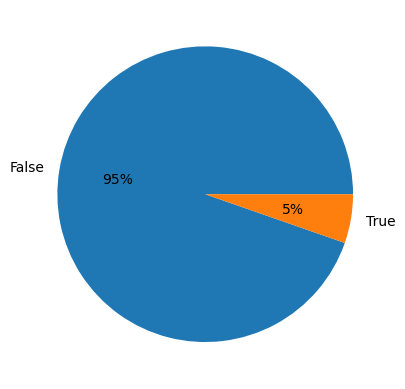

In [42]:
adata_clean.obs[['predicted_doublet']].groupby('predicted_doublet').size().plot(kind='pie', autopct='%1.0f%%')

In [43]:
sum(adata_clean.obs['predicted_doublet'] == True)/adata_clean.shape[0]

0.05349315681187942

# Save `adata_clean` for next time

In [44]:
adata_clean.write_h5ad('/Users/sharmar1/Dropbox/msk_workshop/Handong_2025/data/session_1_adata.h5ad')

# To read next time

In [45]:
adata_clean = sc.read_h5ad('/Users/sharmar1/Dropbox/msk_workshop/Handong_2025/data/session_1_adata.h5ad')

In [46]:
adata_clean

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells'
    uns: 'scrublet'